In [1]:
import sys
import os
import json
from pathlib import Path
import tensorflow as tf
from keras import backend as K

base_path = '/Users/lorenzofederici/Univpm/Tesi/LUS-multitask-learning'
if base_path not in sys.path:
    sys.path.append(base_path)

# import custom lib
from src.utils.dataset import *
from src.experiment import Experiment

gpu = len(tf.config.list_physical_devices('GPU'))>0
if gpu:
    tf.config.set_visible_devices([tf.config.list_physical_devices('GPU')[0],tf.config.list_physical_devices('CPU')[0]])
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)
    print("---> GPU is available <---")

exps_path = '/Users/lorenzofederici/Univpm/Tesi/LUS-multitask-learning/config/params.json'

with open(exps_path) as f:
    configs = json.load(f)


---> GPU is available <---


In [2]:
experiment = Experiment(base_path, output_mode= (True,True))

In [3]:
idx = 0
configs_general = configs['SETTING']
configs_exps    = configs['EXPS'][idx]

for config in configs_exps:
    experiment.build_experiment(configs_general, config, seed = 7)

print('>>Setting: ', configs_general)
print('>>Experiment: ', configs_exps)

experiment.split_dataset()
experiment.generate_split_charts('ldistr')

------------------------------------------------------------------------------------------
>> EXPERIMENT: exp_classification_ResNet_BS8_EP25_OPTAdam_LR0.0001_AUGFalse__DT1311_1656 <<
------------------------------------------------------------------------------------------
230 videos (2154 frames) loaded from cached data.
>>Setting:  {'IMG_SHAPE': 224, 'N_CLASS': 4, 'SEED': 42}
>>Experiment:  [{'backbone': 'ResNet', 'task': 'classification', 'out_class': 4, 'batch_size': 8, 'epoch': 25, 'split_ratio': [0.6, 0.2, 0.2], 'optimizer': 'Adam', 'lr': 0.0001, 'augmentation': False}]

>> SPLITTING:
>>> Dataset Split: Train=1170(54%), Val=517(24%), Test=467(22%)
>>> Train Class Weights: {0: 0.7186732186732187, 1: 1.2942477876106195, 2: 0.78, 3: 1.8055555555555556}
>>> Val Class Weights: {0: 0.9645522388059702, 1: 0.850328947368421, 2: 0.6875, 3: 3.005813953488372}
>>> Test Class Weights: {0: 0.7296875, 1: 2.484042553191489, 2: 0.566747572815534, 3: 2.162037037037037}


UnboundLocalError: cannot access local variable 'chart_file_path' where it is not associated with a value

In [20]:
K.clear_session
model = experiment.build_model()
model = experiment.compile_model(model)

#model.summary()

>> Building model:
	Task --> classification
	Model --> ResUNet


In [21]:
history = experiment.train_model(model)

------------------------------------------------------------
		   ~~~~~~ RUNNING ~~~~~~
------------------------------------------------------------
Epoch 1/25
171/171 [==============================] - ETA: 0s - loss: 1.9183 - accuracy: 0.2643

/Users/lorenzofederici/Univpm/Tesi/LUS-multitask-learning/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


171/171 [==============================] - 113s 586ms/step - loss: 1.9183 - accuracy: 0.2643 - val_loss: 2.0345 - val_accuracy: 0.3158 - lr: 1.0000e-04
Epoch 2/25
171/171 [==============================] - 85s 497ms/step - loss: 0.7781 - accuracy: 0.6021 - val_loss: 2.5267 - val_accuracy: 0.2105 - lr: 1.0000e-04
Epoch 3/25
171/171 [==============================] - 105s 613ms/step - loss: 0.3985 - accuracy: 0.8260 - val_loss: 7.3107 - val_accuracy: 0.3490 - lr: 1.0000e-04
Epoch 4/25
171/171 [==============================] - 117s 686ms/step - loss: 0.4165 - accuracy: 0.8429 - val_loss: 2.6276 - val_accuracy: 0.2825 - lr: 1.0000e-04
Epoch 5/25
171/171 [==============================] - 117s 686ms/step - loss: 0.2072 - accuracy: 0.9200 - val_loss: 3.5756 - val_accuracy: 0.4100 - lr: 1.0000e-04
Epoch 6/25
171/171 [==============================] - 117s 688ms/step - loss: 0.0863 - accuracy: 0.9780 - val_loss: 2.3105 - val_accuracy: 0.3158 - lr: 1.0000e-04
Epoch 7/25
171/171 [==============

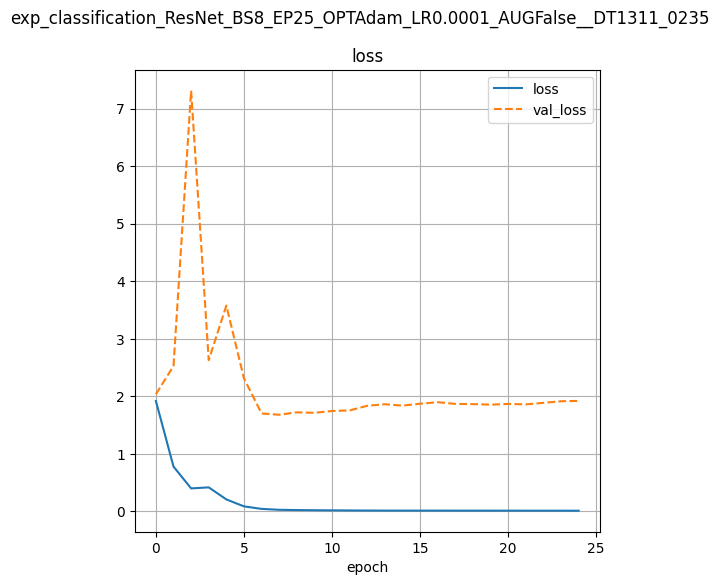

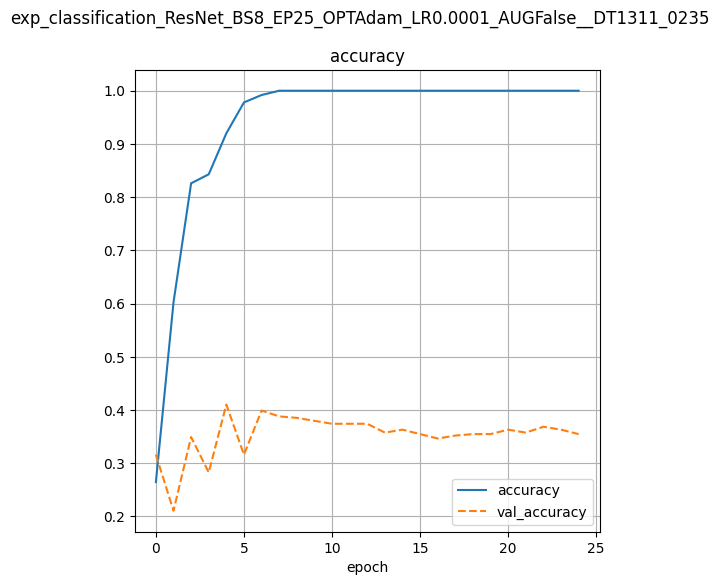

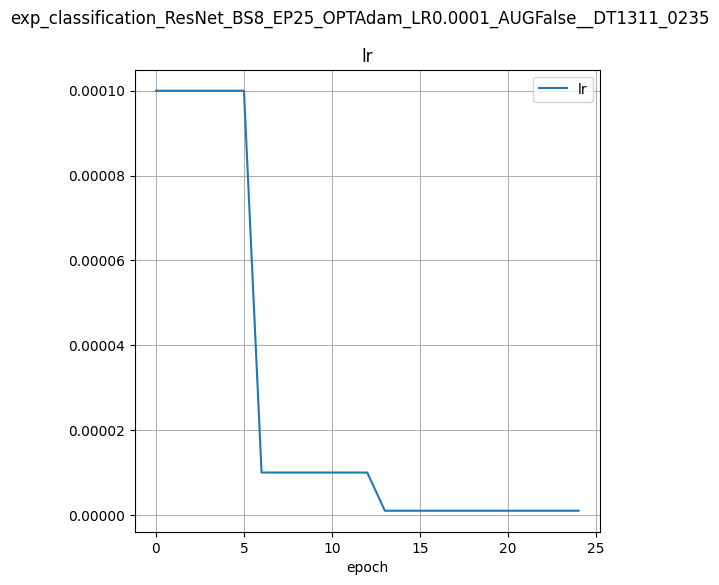

In [22]:
experiment.nn_train_graphs(history)

# Prove

In [ ]:
import numpy as np
dizionario_originale = data_map_idxs_pcm
score = labels

nuovo_dizionario = {}

for chiave, lista_indici in dizionario_originale.items():
    lista_score = [score[i] for i in lista_indici]
    mean_score = int(np.mean(lista_score))
    nuovi_valori = [lista_indici, lista_score, mean_score]

    nuovo_dizionario[chiave] = nuovi_valori

print(nuovo_dizionario)


In [ ]:
indici = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
classi = [0, 1, 2, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3]
print("Dimensione di indici:", len(indici))
print("Dimensione di classi:", len(classi))


# Creazione del dizionario
class_movies = {}

# Iterazione sugli elementi degli array
for indice, classe in zip(indici, classi):
    # Verifica se la classe è già una chiave nel class_movies
    if classe in class_movies:
        # Se sì, aggiungi l'indice alla lista esistente
        class_movies[classe].append(indice)
    else:
        # Se no, crea una nuova chiave e associa l'indice come primo elemento della lista
        class_movies[classe] = [indice]

# Stampare il risultato
print(class_movies)


In [ ]:
class_dict = {
    0: {'movie1': 1, 'movie2': 2, 'movie1': 3, 'movie2': 4, 'movie1': 5, 'movie2': 6},
    1: {'movie3': 7, 'movie4': 8, 'movie3': 9, 'movie4': 10, 'movie3': 11, 'movie4': 112},
    2: {'movie5': 5, 'movie6': 6},
    3: {'movie7': 7, 'movie8': 8}
}
class_movies = []
batch_size = 8
classes = [0,0,0,1,2,3]*int(np.ceil((batch_size/6)))
full_class_dict = class_dict

for cl in range(4):
    class_movies.append(list(class_dict[cl].keys()))

# while True:
class_balanced_batch_generator(classes, batch_size, class_movies, class_dict, full_class_dict)
# final_x, y_onehot = self.process_xy(x,y)
# yield (final_x,y_onehot)